In [1]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
from model.SIR.SIR import SIR
import model.utils as utils

In [2]:
sh_data = utils.read_data("../../dataset/data_xyz/provinceData/上海.json")
sh_data = sh_data.loc[:, ["dateId", "currentConfirmedCount", "deadCount", "curedCount"]]
sh_data

,dateId,currentConfirmedCount,deadCount,curedCount
0,20200120,1,0,0
1,20200121,9,0,0
2,20200122,16,0,0
3,20200123,20,0,0
4,20200124,32,1,0
...,...,...,...,...
826,20220511,4787,572,56157
827,20220512,4589,574,56580
828,20220513,4061,575,57302
829,20220514,3933,578,57595


In [3]:
start_day = 1
all_num, num, rate = utils.init_params("上海", sh_data, start_day)
all_num, num, rate

(1658059.6666666667,
 [1658050.6666666667, 9, 0, 0],
 [0.99999457196856, 5.428031439962253e-06, 0.0, 0.0])

In [4]:
sir = SIR(rate[0], rate[1], rate[2], 1, 0.8195, 0.001)
res = sir.predict(np.arange(0, 100, 1))

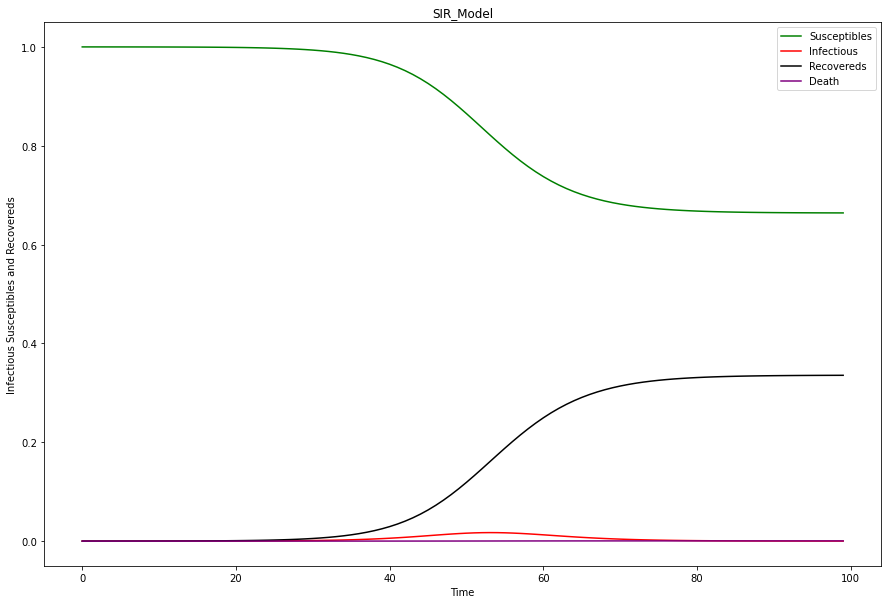

In [5]:
sir.show(res)

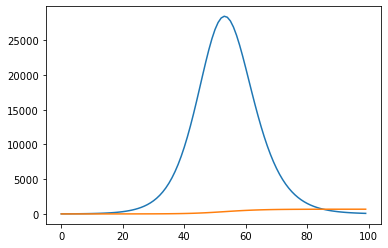

In [12]:
plt.plot(res[:,1] * all_num)
plt.plot(res[:,3] * all_num)
plt.show()

In [21]:
save_path = "../../dataset/data_predict/SIR/sh_predict.csv"
tend = pd.DataFrame(res[:,1:])
tend = tend.rename({0:"confirmedCount", 1:"curedCount", 2:"deadCount"},axis=1)
tend = tend * all_num
tend.to_csv(save_path)